In [22]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
data_path ='/Users/cosmo/Documents/thesis/data/NO2_NO_NH3_freq_meas_data_2021-02-16.xlsx'
raw_response = pd.read_excel(data_path, sheet_name = 1)

In [24]:
raw_response.head()

,NO2,NO,NH3,1,2,3,4,5,6,7,...,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294
0,50,100,25,0.000263,0.000263,0.000263,0.000263,0.000262,0.000262,0.000262,...,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245
1,100,25,100,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,...,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260
2,25,100,50,0.000259,0.000259,0.000259,0.000259,0.000259,0.000258,0.000258,...,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000247
3,50,25,100,0.000246,0.000246,0.000247,0.000247,0.000247,0.000247,0.000247,...,0.000262,0.000262,0.000262,0.000262,0.000261,0.000261,0.000261,0.000261,0.000260,0.000260
4,100,100,25,0.000257,0.000257,0.000257,0.000257,0.000256,0.000256,0.000256,...,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243


In [25]:
x = raw_response.columns[3:]


In [26]:
y = raw_response.iloc[0][3:]

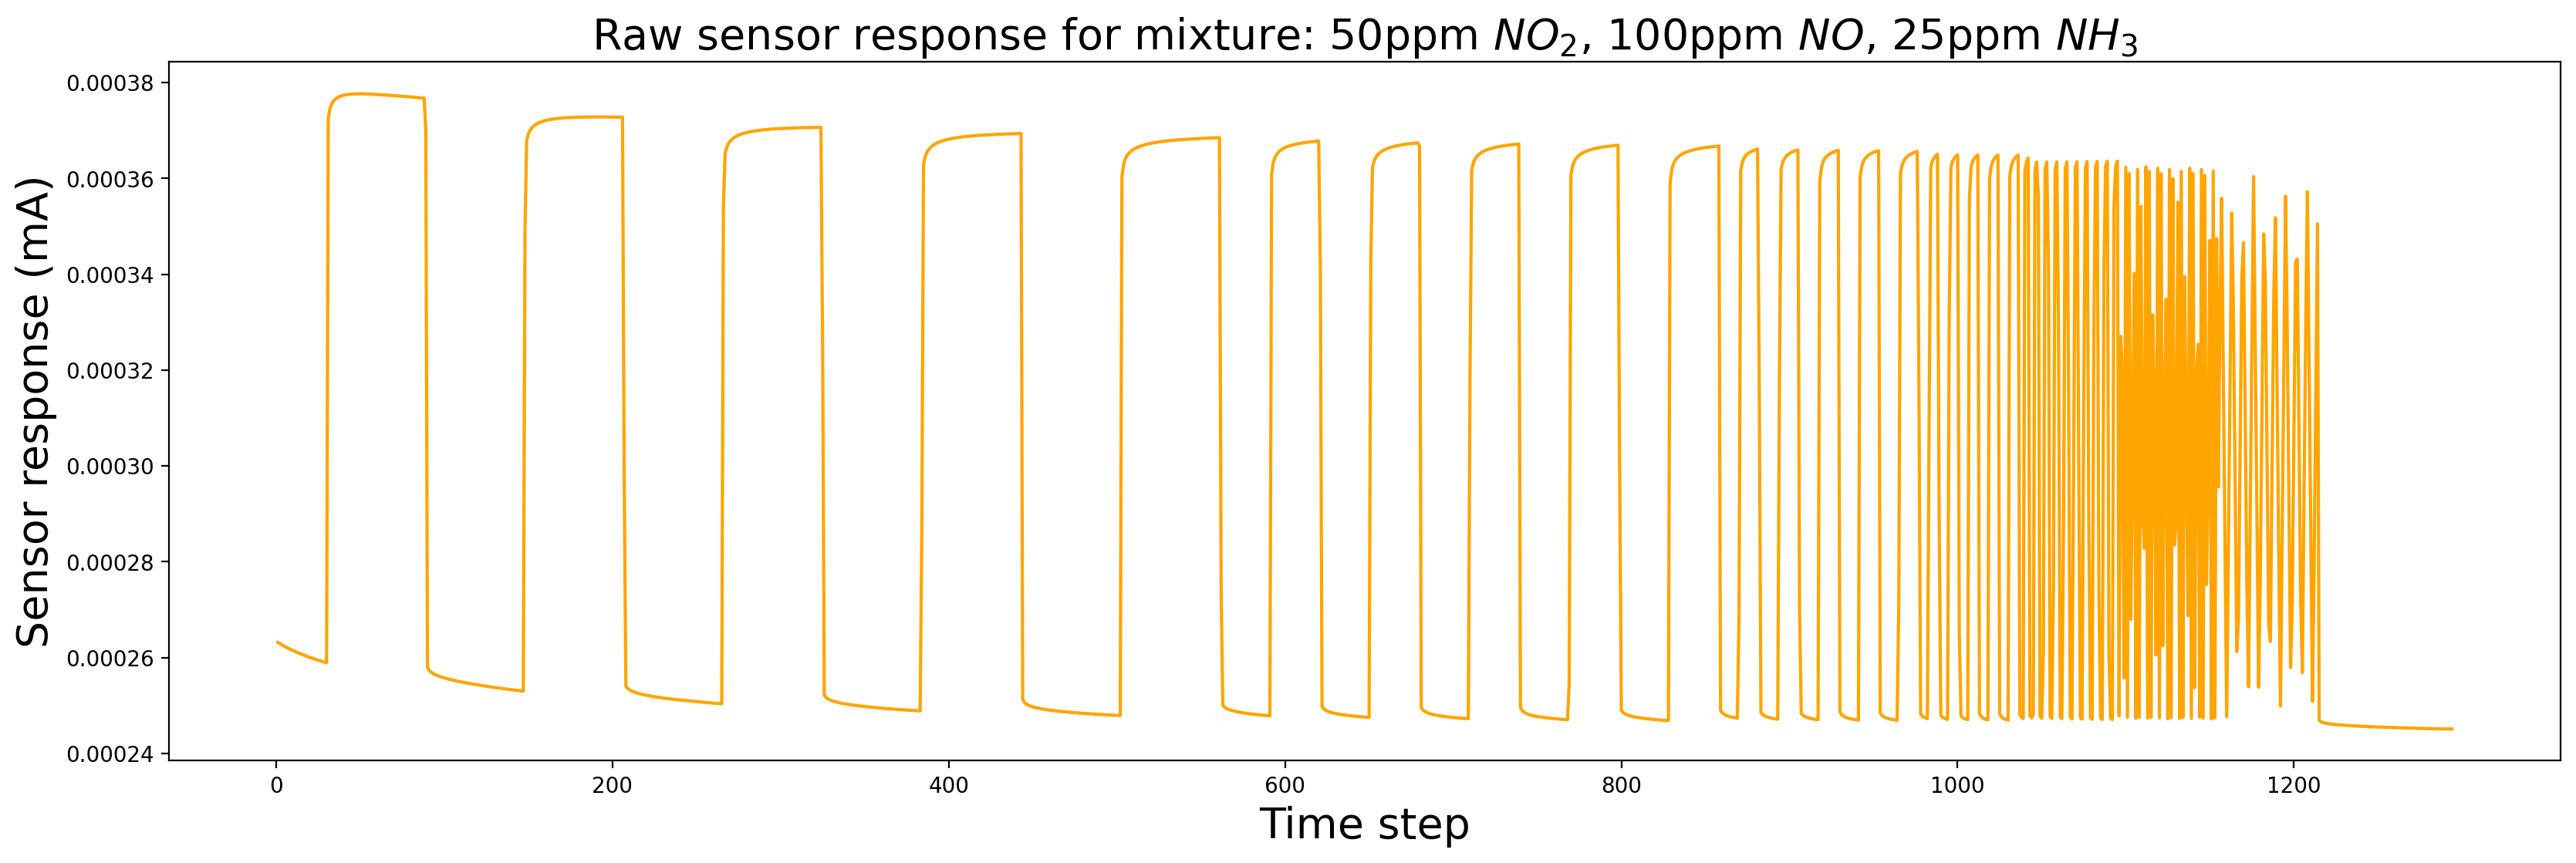

In [27]:
plt.figure(num=None, figsize=(20, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(x,y, color = 'orange')
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Sensor response (mA)', fontsize = 20)
plt.title(r'Raw sensor response for mixture: 50ppm $NO_2$, 100ppm $NO$, 25ppm $NH_3$', fontsize=20)

plt.savefig('../figures/raw-response.png')
plt.show()

In [28]:
from sklearn import preprocessing
import numpy as np

y_scaled = np.asarray(y)

y_scaled =preprocessing.StandardScaler().fit_transform(y_scaled.reshape(-1,1))

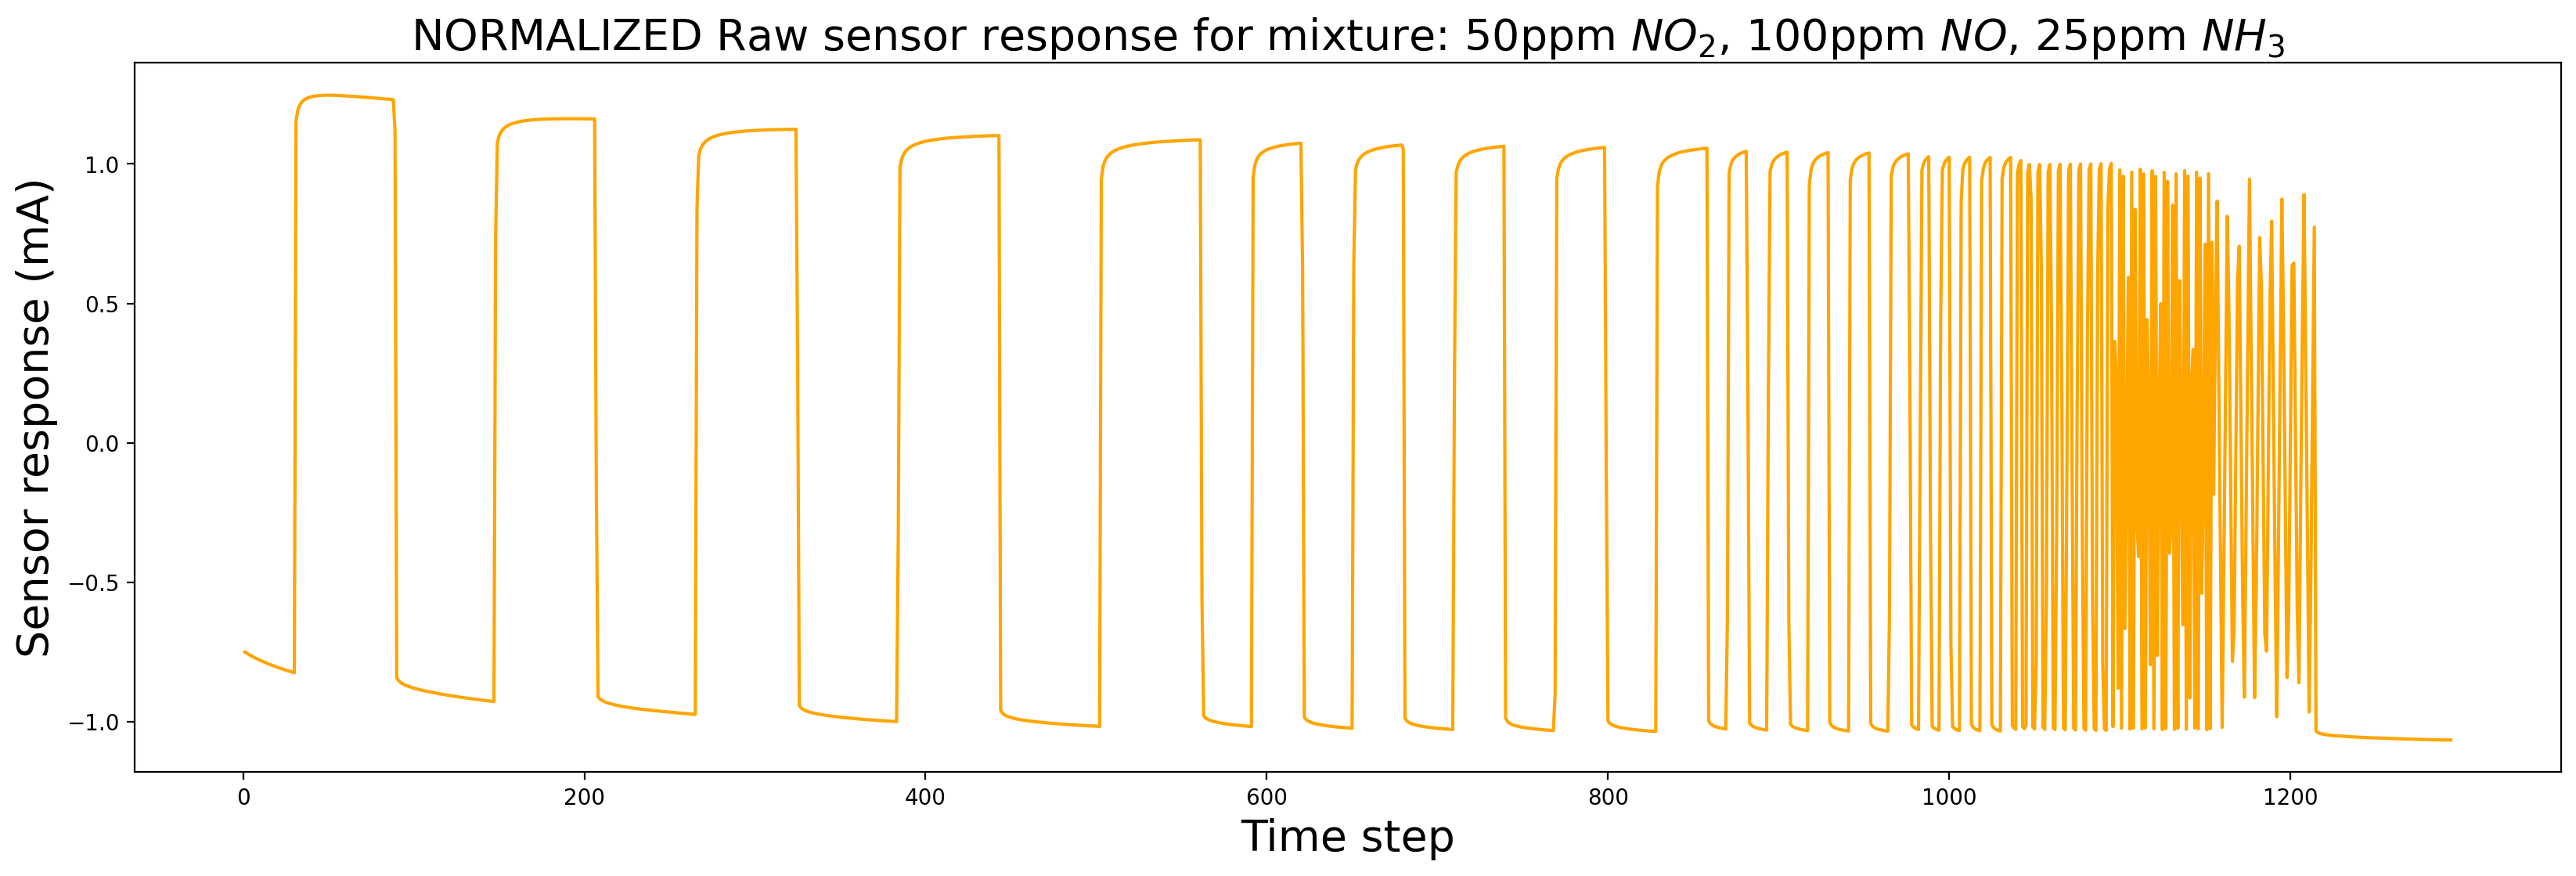

In [29]:
plt.figure(num=None, figsize=(20, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(x,y_scaled, color = 'orange')
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Sensor response (mA)', fontsize = 20)
plt.title(r'NORMALIZED Raw sensor response for mixture: 50ppm $NO_2$, 100ppm $NO$, 25ppm $NH_3$', fontsize=20)

#plt.savefig('../figures/raw-response.png')
plt.show()

# Creating dummy dataset

In [30]:
import itertools
import pandas as pd
import numpy as np

# Possible concentrations
concentrations = [10, 20, 40,  80, 160]

# Possible mixtures
mixtures = [p for p in itertools.product(concentrations, repeat=3)]

# Creating df
df = pd.DataFrame(mixtures)
df.rename(columns = {0:'NO', 1:'NO2', 2:'NH3'}, inplace = True)

# Populating with N(0,1)
for i in range(160):
    df[f'Slope{i}'] = np.random.normal(0,1,125)
    df[f'Avg{i}']= np.random.normal(0,1,125)

In [31]:
df.head()

,NO,NO2,NH3,Slope0,Avg0,Slope1,Avg1,Slope2,Avg2,Slope3,...,Slope155,Avg155,Slope156,Avg156,Slope157,Avg157,Slope158,Avg158,Slope159,Avg159
0,10,10,10,-1.053930,-0.467513,-0.596738,-1.075078,0.212443,1.853709,-0.079935,...,0.332561,0.564451,-1.452775,-2.202311,-1.155048,0.309748,-1.390987,-0.332845,-1.231532,-0.601803
1,10,10,20,-0.795882,0.855716,1.437383,0.175520,0.352423,0.889690,-0.414817,...,0.006486,1.512114,-0.400717,0.632863,1.148832,1.012407,0.475138,-0.783891,-1.109588,1.750958
2,10,10,40,0.576892,-0.201248,0.465523,0.942332,0.826740,0.067348,0.117457,...,-0.246832,-0.119566,1.087101,-0.083632,-0.624848,1.179701,0.533216,0.986230,-1.972766,0.209845
3,10,10,80,1.167701,-0.852492,-0.781137,-0.169125,-0.115558,-0.952245,0.385659,...,-1.177427,0.054620,-1.145144,-1.639077,1.468230,-1.157746,1.810652,0.377882,-1.880615,-1.309024
4,10,10,160,-0.494764,-0.191305,1.301011,-0.977806,0.499197,1.083211,0.399406,...,-0.113687,0.284411,-0.863787,0.943376,0.447707,-0.932944,1.952106,-1.722438,3.588752,0.339135


In [32]:
## from scipy import signal
import matplotlib.pyplot as plt

freqs = [0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2500, 5000]
durations = [20, 10, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
end_times = np.cumsum(durations)
start_times =  end_times - durations

In [33]:
feat_start = [0, 9.6, 10.0, 19.6, 20.0, 24.6, 25.0, 29.6, 30.0, 31.6, 32.0, 33.6, 34.0, 34.6, 35.0, 35.6, 36.0, 36.6, 37.0, 37.6, 38.0, 38.6, 39.0, 39.6, 40.0, 40.6, 41.0, 41.6, 42.0, 42.6, 43.0, 43.6, 44.0, 44.6, 45.0, 45.6, 46.0,46.6,47.0, 47.6, 48.0, 48.6, 49.0, 49.6, 50.0,  50.6,  51.0,  51.6,  52.0, 52.6, 53.0, 53.6, 54.0, 54.6, 55.0, 55.6, 56.0, 56.6, 57.0, 57.6, 58.0, 58.6, 59.0, 59.6]

feat_end = [f + 0.4 for f in feat_start]

In [34]:
# sample_rate = 1000

# time = []
# freq_cycle = []

# for start, end, freq in zip(start_times, end_times, freqs):
#     t = np.linspace(start, end, sample_rate)
#     time.append(t)
#     freq_cycle.append(signal.square(2 * np.pi * freq * t))
# time = np.concatenate(time).ravel().tolist()
# freq_cycle = np.concatenate(freq_cycle).ravel().tolist()

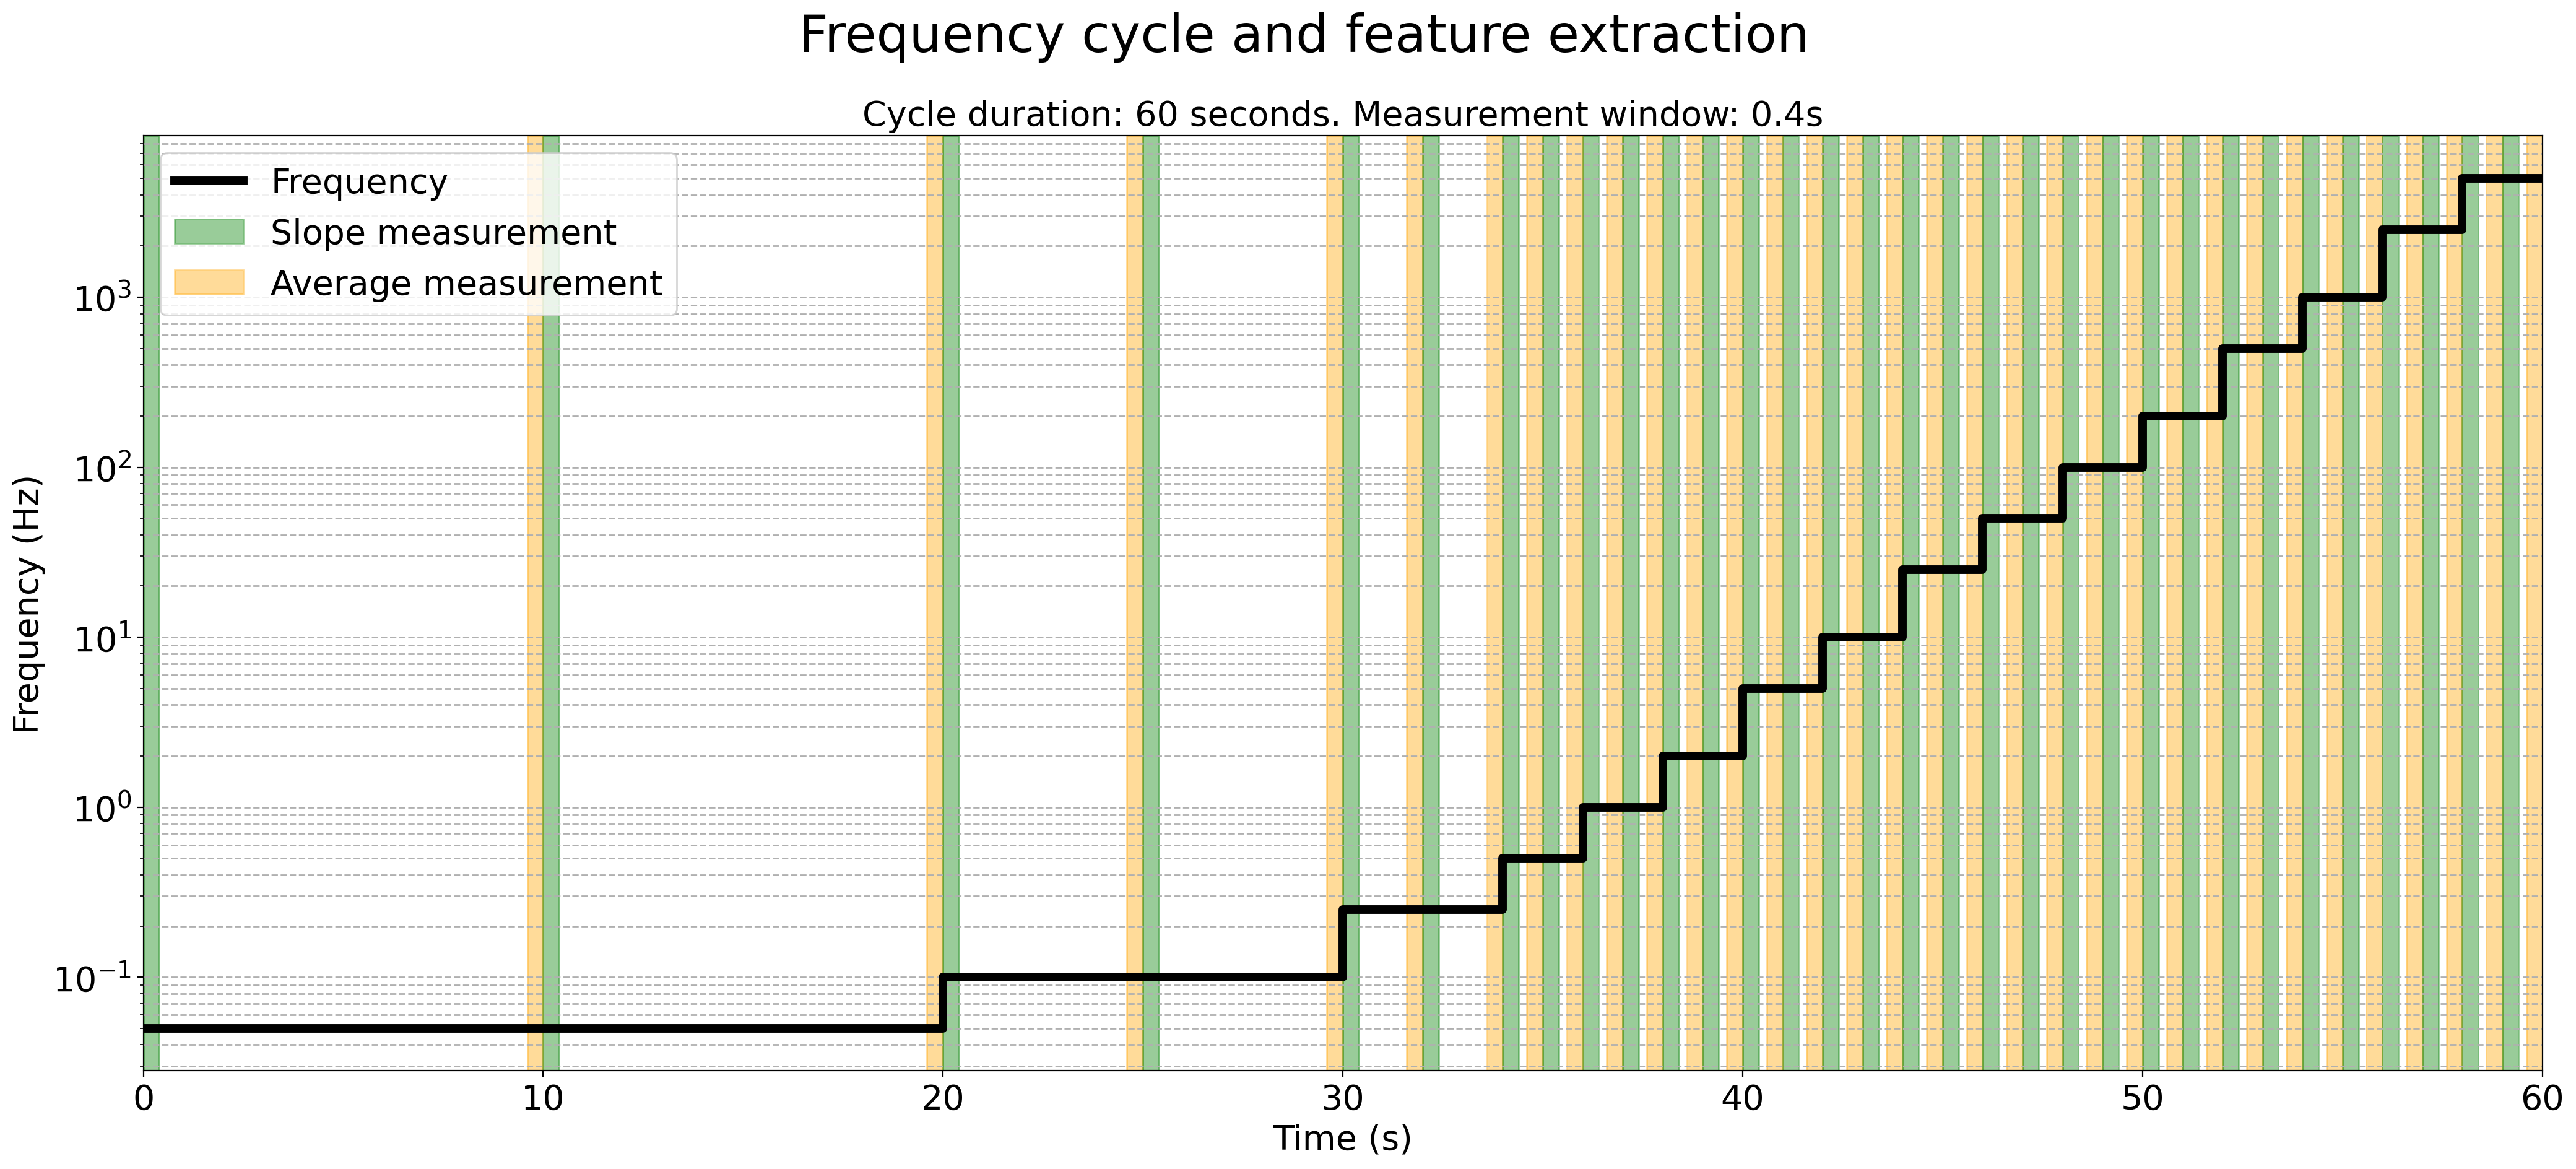

In [35]:
# Plotting measurements time
plt.figure(num=None, figsize=(25, 10), dpi=200, facecolor='w', edgecolor='k')
# Log-scale: too big of a range (0.05,5000)
plt.yscale('log')
# Frequencies represented as steps to avoid "solid block of lines" in high frequencies
plt.step(np.append(start_times, 60), np.append(freqs, 5000), where = 'post', color = 'black', lw = 5, label = 'Frequency')
# Adding measurements time windows
plt.axvspan(feat_start[0], feat_end[0], alpha=0.4, color='green', label = 'Slope measurement')
plt.axvspan(feat_start[1], feat_end[1], alpha=0.4, color='orange', label = 'Average measurement')
for (start, end, i) in zip(feat_start[2:], feat_end[2:], range(2,len(feat_start))):
    mod = i % 2
    if mod == 0: #slope
        plt.axvspan(start, end, alpha=0.4, color='green')
    else: #average
        plt.axvspan(start, end, alpha=0.4, color='orange')
    
# Titles, axes, etc.
plt.suptitle('Frequency cycle and feature extraction', fontsize=30)
plt.title('Cycle duration: 60 seconds. Measurement window: 0.4s', fontsize = 20)
plt.xlabel('Time (s)', fontsize = 20)
plt.ylabel('Frequency (Hz)', fontsize = 20)
plt.grid(axis = 'y', which = 'both', linestyle='--', linewidth=1)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim((0,60 ))
plt.legend(prop={'size': 20})
plt.savefig('../figures/measurement-windows.png')
plt.show()

